# This Notebook is to present the code to Predict Car Accident Severity for the provided data set


In [5]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
#Cleaning the data
csv_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(csv_path)
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(169126, 38)

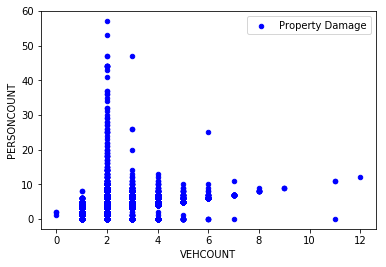

In [7]:
ax = df[df["SEVERITYCODE"] == 1].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Blue", label = "Property Damage")
plt.show()

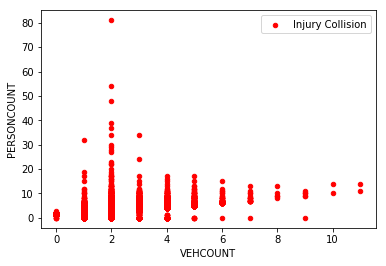

In [8]:
ax = df[df["SEVERITYCODE"] == 2].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Red", label = "Injury Collision")
plt.show()

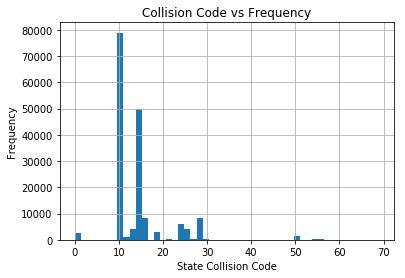

In [9]:
df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision Code vs Frequency")
plt.xlabel("State Collision Code")
plt.ylabel("Frequency")
plt.show()

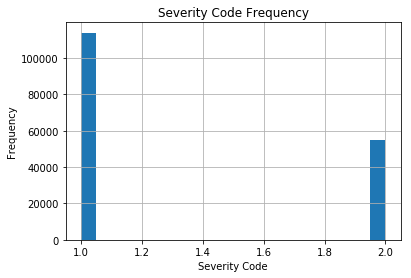

In [10]:
#Identify the frequecy of Severity Code
df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Code Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

In [11]:
X= df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

Actual values of the test cases: [2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2]


In [12]:
#Create the test & train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_hat = clf_tree.predict(X_train)
scores["Tree-f1-score"] = f1_score(y_train, y_hat, average = "weighted")
scores["Tree-jaccard"] = jaccard_similarity_score(y_train, y_hat)
print("Using a decision tree, we get the predicted values to be: " + str(y_hat[0:20]))
scores

Using a decision tree, we get the predicted values to be: [2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


{'Tree-f1-score': 0.6902247634772901, 'Tree-jaccard': 0.7383739837398374}

Test set Accuracy at k= 1 :  0.4433867439247916
Test set Accuracy at k= 2 :  0.5964642582628747
Test set Accuracy at k= 3 :  0.5980606633950216
Test set Accuracy at k= 4 :  0.6178679122568439
Test set Accuracy at k= 5 :  0.6458936912434222
Test set Accuracy at k= 6 :  0.6295748832259209
Test set Accuracy at k= 7 :  0.6496481996097676
Test set Accuracy at k= 8 :  0.7076804824691066
Test set Accuracy at k= 9 :  0.7254478803287412


Text(0, 0.5, 'Testing Accuracy')

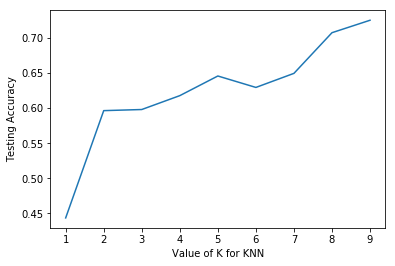

In [18]:
#KNN Accuracy Test to select the best K
k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    y_hat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_similarity_score(y_test, y_hat))
    accuracy_score.append(jaccard_similarity_score(y_test, y_hat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [19]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))

Predicted values using k = 9: [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_similarity_score(y, y_hat)))

KNN F1-Score: 0.601255208417448
KNN Jaccard Score: 0.6833485093953621
